In [19]:
import pandas as pd
import numpy as np
import datetime

# Train

In [4]:
train = pd.read_csv('train/train.csv')

In [5]:
train.shape

(1159576, 3)

In [6]:
train

,phone_id,order_completed_at,target
0,19843,2020-01,1.0
1,19843,2020-02,0.0
2,19843,2020-03,0.0
3,19843,2020-04,0.0
4,19843,2020-05,0.0
...,...,...,...
1159571,23853,2020-03,0.0
1159572,23853,2020-04,0.0
1159573,23853,2020-05,0.0
1159574,23853,2020-06,1.0


In [87]:
train.iloc[0]['order_completed_at']

'2020-01'

# submission

In [60]:
submission = pd.read_csv('sample_submission.csv', sep=';')
submission.shape

(214609, 2)

In [61]:
submission

,Id,Predicted
0,19843,NaN
1,471287,NaN
2,342522,NaN
3,457799,NaN
4,233778,NaN
...,...,...
214604,16841,NaN
214605,69348,NaN
214606,594974,NaN
214607,320024,NaN


In [62]:
submission['Id'].nunique()

214609

In [ ]:
train.merge(submission)

# Target

In [10]:
pd.crosstab(train['target'], train['order_completed_at'], normalize=True).style.background_gradient(cmap='spring')

order_completed_at,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
target,,,,,,,
0.0,0.031947,0.0363452,0.0507729,0.0543354,0.0850707,0.11021,0.130916
1.0,0.0194959,0.0291831,0.041322,0.0835124,0.10342,0.109081,0.114388


In [11]:
pd.crosstab(train['target'], train['order_completed_at']).style.background_gradient(cmap='spring')

order_completed_at,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
target,,,,,,,
0.0,37045,42145,58875,63006,98646,127797,151807
1.0,22607,33840,47916,96839,119923,126488,132642


# ship

In [16]:
shipments1 = pd.read_csv('shipments/shipments2020-01-01.csv')
shipments3 = pd.read_csv('shipments/shipments2020-03-01.csv')
shipments4 = pd.read_csv('shipments/shipments2020-04-30.csv')
shipments6 = pd.read_csv('shipments/shipments2020-06-29.csv')

In [26]:
shipments1.head()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,...,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,datetime,date
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,...,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,2020-02-20 08:08:54,2020-02-20
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,...,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,2020-01-03 18:10:40,2020-01-03
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,2020-02-13 12:33:53,2020-02-13
3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,...,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,2020-01-25 19:55:32,2020-01-25
4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,...,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,2020-01-07 19:51:37,2020-01-07


In [21]:
shipments1.iloc[0]['datetime']

Timestamp('2020-02-20 08:08:54')

In [25]:
shipments1['datetime'] = pd.to_datetime(shipments1['shipped_at'])
shipments1['date'] = shipments1['datetime'].apply(lambda x: x.date())
shipments1['month'] = shipments1['date'].apply(lambda x: x.month)

In [31]:
shipments1['month'].value_counts()

2.0    73344
1.0    49699
3.0     1719
Name: month, dtype: int64

# address

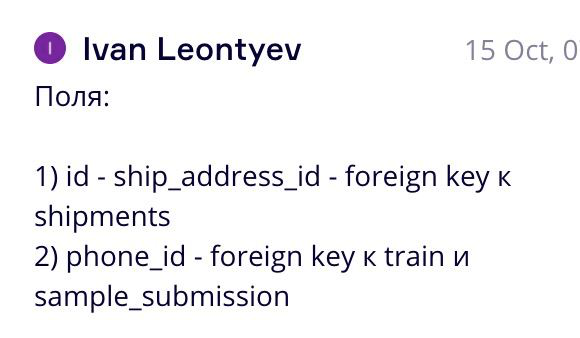

In [51]:
address = pd.read_csv('misc/addresses.csv')
address = address.drop_duplicates()

In [50]:
address[address['id'] == 181263]

,id,phone_id
829990,181263,78188
829991,181263,78188


In [52]:
address.head()

,id,phone_id
0,41,1
1,8531,2
2,2982657,2
3,3271801,2
4,3648206,2


In [53]:
address.shape

(2724011, 2)

In [54]:
address['id'].nunique(), address['phone_id'].nunique()

(2724011, 719374)

In [34]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766724 entries, 0 to 2766723
Data columns (total 2 columns):
id          int64
phone_id    int64
dtypes: int64(2)
memory usage: 42.2 MB


# join

In [56]:
print(train.shape)

train.merge(address,
           left_on='phone_id',
           right_on='phone_id',
           how='inner').shape

(1159576, 3)


(8946211, 4)

In [ ]:
submission.merge()

In [38]:
shipments1.merge(address,
                left_on='ship_address_id',
                right_on='id',
                how='inner').shape

(143448, 25)

In [39]:
shipments1.shape

(141546, 23)

# Check

In [9]:
from glob import glob
files = glob('line_items*/*')

items = []
for f in files:
    items.append(pd.read_csv(f))

In [12]:
len(items)

77

In [13]:
items[0].head()

,shipment_id,master_category_id,created_at,price,discount,item_id,quantity,product_id,brand_name,pricer,replaced,cancelled
0,595710,246.0,2018-09-19 18:25:41,2060.000000,0.0,6893159,1,8296,Ariel,Pricer::PerItem,0,0
1,595710,77.0,2018-09-19 18:26:09,34.290001,0.0,6893172,10,2575,Aro,Pricer::PerItem,0,0
2,595710,255.0,2018-09-19 19:48:44,1199.000000,0.0,6894846,1,8082,Bagi,Pricer::PerItem,0,0
3,655241,37.0,2018-10-28 08:37:25,162.000000,0.0,7747094,1,39627,Unagrande,Pricer::PerItem,0,0
4,655241,21.0,2018-10-28 08:37:47,44.590000,0.0,7747105,2,91973,Landliebe,Pricer::PerItem,0,0


# Message

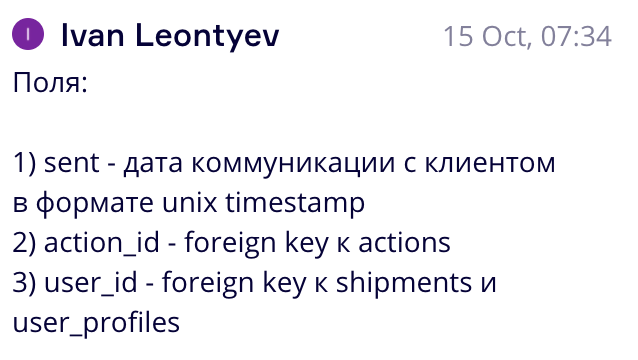

In [67]:
actions = pd.read_csv('messages/actions.csv')
messages = pd.read_csv('messages/messages.csv')

actions.shape, messages.shape

((962, 4), (18275907, 3))

In [68]:
actions

,id,subject,body,type
0,239,NaN,NaN,push
1,77,NaN,NaN,push
2,213,Бесплатно доставим вам первый заказ👍,"Оформляйте скорее, доставим в удобное время!",push
3,218,👍 Новые скидки METRO в Instamart,Успей заказать продукты по выгодной цене!,push
4,221,Дарим 500 рублей за приглашенного друга!,"Обнови приложение, получи промокод и делись им...",push
...,...,...,...,...
957,2942,NaN,Скидка 500р на заказ товаров для офиса по пром...,sms
958,2925,NaN,NaN,sms
959,2927,NaN,NaN,sms
960,2928,NaN,NaN,sms


In [73]:
actions['type'].value_counts()

push     577
email    270
sms      115
Name: type, dtype: int64

In [75]:
messages['datetime'] = messages['sent'].apply(lambda x: 
                                              datetime.datetime.utcfromtimestamp(x))

In [88]:
messages['datetime_str'] = messages['sent'].apply(lambda x: 
                                              datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%dT%H:%M:%SZ'))

In [90]:
messages.iloc[0]['datetime_str'][:7]

'2020-05'

In [93]:
messages['month_str'] = messages['datetime_str'].apply(lambda x: x[:7])

In [77]:
messages['date'] = messages['datetime'].apply(lambda x: x.date())

In [80]:
messages['month'] = messages['date'].apply(lambda x: x.month)

In [94]:
messages.head()

,sent,action_id,user_id,datetime,date,month,id,subject,body,type,datetime_str,month_str
0,1.588847e+09,1512.0,1775692,2020-05-07 10:26:54,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:26:54Z,2020-05
1,1.588847e+09,1512.0,1775687,2020-05-07 10:26:44,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:26:44Z,2020-05
2,1.588847e+09,1512.0,1775684,2020-05-07 10:26:32,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:26:32Z,2020-05
3,1.588847e+09,1512.0,1775678,2020-05-07 10:25:56,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:25:56Z,2020-05
4,1.588847e+09,1512.0,1775660,2020-05-07 10:24:20,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:24:20Z,2020-05


In [82]:
messages['month'].value_counts()

7    5602389
8    3950838
5    3132141
6    2450590
4    1634203
3     671064
2     572474
1     262208
Name: month, dtype: int64

In [95]:
messages['month_str'].value_counts()

2020-07    5602389
2020-08    3950838
2020-05    3132141
2020-06    2450590
2020-04    1634203
2020-03     671064
2020-02     572474
2020-01     262208
Name: month_str, dtype: int64

In [83]:
messages.merge(actions,
              left_on='action_id',
              right_on='id',
              how='left').shape

(18275907, 10)

In [84]:
messages = messages.merge(actions,
              left_on='action_id',
              right_on='id',
              how='left')

In [86]:
pd.crosstab(messages['month'], messages['type'])

type,email,push,sms
month,,,
1,27153,235055,0
2,45369,527105,0
3,48917,622147,0
4,350795,1283408,0
5,222670,2909471,0
6,247387,2203203,0
7,455450,5146939,0
8,743905,2916929,290004


In [96]:
messages

,sent,action_id,user_id,datetime,date,month,id,subject,body,type,datetime_str,month_str
0,1.588847e+09,1512.0,1775692,2020-05-07 10:26:54,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:26:54Z,2020-05
1,1.588847e+09,1512.0,1775687,2020-05-07 10:26:44,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:26:44Z,2020-05
2,1.588847e+09,1512.0,1775684,2020-05-07 10:26:32,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:26:32Z,2020-05
3,1.588847e+09,1512.0,1775678,2020-05-07 10:25:56,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:25:56Z,2020-05
4,1.588847e+09,1512.0,1775660,2020-05-07 10:24:20,2020-05-07,5,1512,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,2020-05-07T10:24:20Z,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...
18275902,1.597229e+09,2515.0,2551475,2020-08-12 10:49:41,2020-08-12,8,2515,NaN,Cкидка 7% по промокоду Back7 действует до 14.0...,sms,2020-08-12T10:49:41Z,2020-08
18275903,1.597229e+09,2515.0,2465134,2020-08-12 10:44:59,2020-08-12,8,2515,NaN,Cкидка 7% по промокоду Back7 действует до 14.0...,sms,2020-08-12T10:44:59Z,2020-08
18275904,1.597228e+09,2515.0,2472800,2020-08-12 10:32:09,2020-08-12,8,2515,NaN,Cкидка 7% по промокоду Back7 действует до 14.0...,sms,2020-08-12T10:32:09Z,2020-08
18275905,1.597227e+09,2515.0,2551294,2020-08-12 10:17:24,2020-08-12,8,2515,NaN,Cкидка 7% по промокоду Back7 действует до 14.0...,sms,2020-08-12T10:17:24Z,2020-08


In [97]:
shipments = pd.concat([shipments1,
                        shipments3,
                        shipments4,
                        shipments6])

shipments.shape

/data/home/ivyeliso/mts_tv_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(2260686, 23)

In [ ]:
# доделать джоин и сделать кат фичи из subject, body, type

In [98]:
# доделать джоин 
shipments.merge(messages, 
               on='user_id',
               how='left').shape

(91575123, 34)